In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from brokenaxes import brokenaxes
import pickle

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


## data_2003


In [81]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/'
real_vals = [7.68e-4, -1.98]
real_cov = np.array([[(0.04e-4)**2, 0],
                    [0, (0.005)**2]])
piv = 100

folders = [
    f'{path}fit_2003/crab_band_fit',
    f'{path}fit_2003/crab_band_fit_20_400',
    f'{path}fit_2003/crab_band_fit_30_400',
    # f'{path}fit_2003/crab_band_fit_35_81',
    f'{path}fit_2_2003_combined/crab_band_fit',
    f'{path}fit_2_2003_combined/crab_band_fit_20_600',
    f'{path}fit_2_2003_combined/crab_band_fit_35_1000',
    f'{path}fit_3_2003_combined/crab_band_fit',
]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]

d_M = []
for p in folders:
    val = np.loadtxt(f"{p}/fit_val.txt")[:2]
    cov = np.loadtxt(f"{p}/fit_cov.txt")[:2, :2]
    print(val)
    print("\n")
    print(cov)
    d_M.append(mahalanobis_dist(val, cov, real_vals))

names = [
    'SE 20-600keV',
    'SE 20-400keV',
    'SE 30-400keV',
    #3_SE/crab_band_fit_35_81',
    'combined 20-1000keV; $\\beta = -2.24$',
    'combined 20-600keV; $\\beta = -2.22$',
    'combined 35-1000keV; $\\beta = -2.32$',
    "combined 3 20-1000keV",
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    5,
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    # "C3",
    "C0",
    "C1",
    "C4",
    "C4"
]
linestyles = [
    "solid",
    "solid",
    "solid",
    # "solid",
    "dotted",
    "dotted",
    'dotted',
    "dashed",
    "dashed",
    "dotted",
]


[ 8.54015636e-04 -1.94585896e+00]


[[8.08567485e-12 8.63455657e-09]
 [8.63455657e-09 1.14370576e-05]]
[ 8.55087046e-04 -1.94450518e+00]


[[7.92076081e-12 8.45055568e-09]
 [8.45055568e-09 1.12646000e-05]]
[ 8.63256002e-04 -1.90013808e+00]


[[8.46619449e-12 1.01337413e-08]
 [1.01337413e-08 1.58057124e-05]]
[ 8.52391635e-04 -1.94577953e+00]


[[8.74172194e-12 9.61746583e-09]
 [9.61746583e-09 1.28669106e-05]]
[ 8.53806025e-04 -1.94520347e+00]


[[8.72430364e-12 9.36175975e-09]
 [9.36175975e-09 1.21679360e-05]]
[ 8.54404576e-04 -1.88289227e+00]


[[9.32895891e-12 1.26375955e-08]
 [1.26375955e-08 2.46762184e-05]]
[ 7.49963204e-04 -1.94468280e+00]


[[7.65215160e-12 9.49424390e-09]
 [9.49424390e-09 1.42740794e-05]]


Text(0.5, 1.0, 'Data 2003')

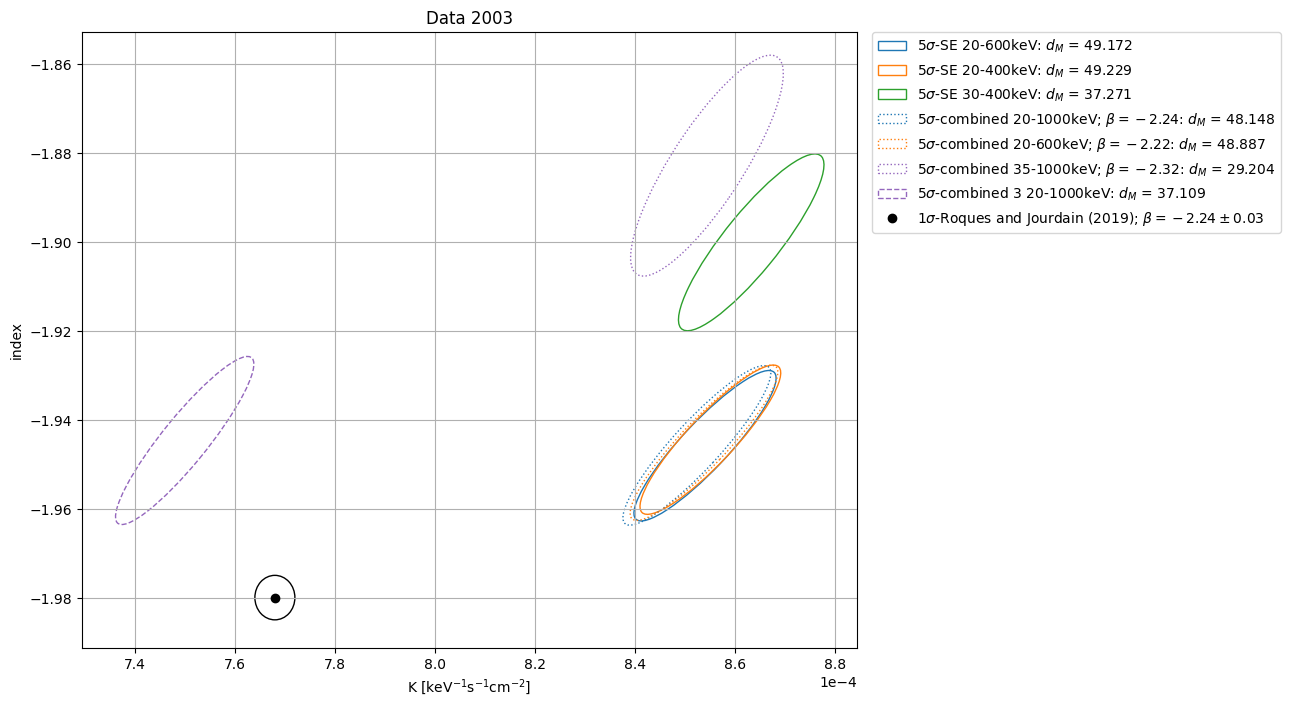

In [82]:
import math
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    val = np.loadtxt(f"{folder}/fit_val.txt")[:2]
    cov = np.loadtxt(f"{folder}/fit_cov.txt")[:2, :2]
    confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle)
ax.plot(real_vals[0], real_vals[1], "ko", label="1$\sigma$-Roques and Jourdain (2019); $\\beta = -2.24 \pm 0.03$")
confidence_ellipse(real_vals, real_cov, ax, n_std=1, edgecolor="black", ls="solid")
ax.autoscale()
ax.grid()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.set_title("Data 2003")

In [79]:
print(path)

/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/


In [80]:
fig.savefig(f"{path}/comparison_plot_2003_all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

# data_2017

In [71]:
path = '/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_19/'
real_vals = [7.417e-4, -1.98]
real_cov = np.array([[(0.03e-4)**2, 0],
                    [0, (0.004)**2]])
piv = 100

folders = [
    f'{path}fit_2017/crab_band_fit',
    f'{path}fit_2017/crab_band_fit_20_400',
    f'{path}fit_2017/crab_band_fit_30_400',
    # f'{path}fit_2017/crab_band_fit_35_81',
    f'{path}fit_2_2017_combined/crab_band_fit',
    f'{path}fit_2_2017_combined/crab_band_fit_20_600',
    f'{path}fit_2_2017_combined/crab_band_fit_35_1000',
]
# folders = [
#     f'{path}/normal_new/0374/pre_ppc',
#     f'{path}/normal_reduced_bkg_10_new/0374/pre_ppc',
#     f'{path}/normal_new/0374/spimodfit',
#     f'{path}/normal_reduced_bkg_10_new/0374/spimodfit',
# ]

d_M = []
for p in folders:
    val = np.loadtxt(f"{p}/fit_val.txt")[:2]
    cov = np.loadtxt(f"{p}/fit_cov.txt")[:2, :2]
    print(val)
    print("\n")
    print(cov)
    d_M.append(mahalanobis_dist(val, cov, real_vals))

names = [
    'SE 20-600keV',
    'SE 20-400keV',
    'SE 30-400keV',
    #3_SE/crab_band_fit_35_81',
    'combined 20-1000keV; $\\beta = -2.22$',
    'combined 20-600keV; $\\beta = -2.19$',
    'combined 35-1000keV; $\\beta = -2.29$',
]

std_devs = [
    5,
    5,
    5,
    5,
    5,
    5,
    5,
]

names = [f"{std_devs[i]}$\\sigma$-{names[i]}: $d_M$ = {d_M[i]:.3f}" for i in range(len(d_M))]

edgecolors = [
    "C0",
    "C1",
    "C2",
    # "C3",
    "C0",
    "C1",
    "C4",
    "C4"
]
linestyles = [
    "solid",
    "solid",
    "solid",
    # "solid",
    "dotted",
    "dotted",
    'dotted',
    "dashed",
    "dashed",
    "dotted",
]


[ 8.27706555e-04 -1.94164108e+00]


[[1.28191804e-11 1.44037905e-08]
 [1.44037905e-08 1.95603573e-05]]
[ 8.30523436e-04 -1.93901481e+00]


[[1.29117168e-11 1.46094269e-08]
 [1.46094269e-08 1.99776292e-05]]
[ 8.41371053e-04 -1.88812449e+00]


[[1.32976069e-11 1.68765323e-08]
 [1.68765323e-08 2.74038878e-05]]
[ 8.26166326e-04 -1.94359403e+00]


[[1.44042988e-11 1.63806883e-08]
 [1.63806883e-08 2.21367511e-05]]
[ 8.27121066e-04 -1.94284727e+00]


[[1.53702690e-11 1.73174288e-08]
 [1.73174288e-08 2.28736192e-05]]
[ 8.28451917e-04 -1.87512554e+00]


[[1.43282345e-11 2.00433015e-08]
 [2.00433015e-08 3.86878986e-05]]


Text(0.5, 1.0, 'Data 2017')

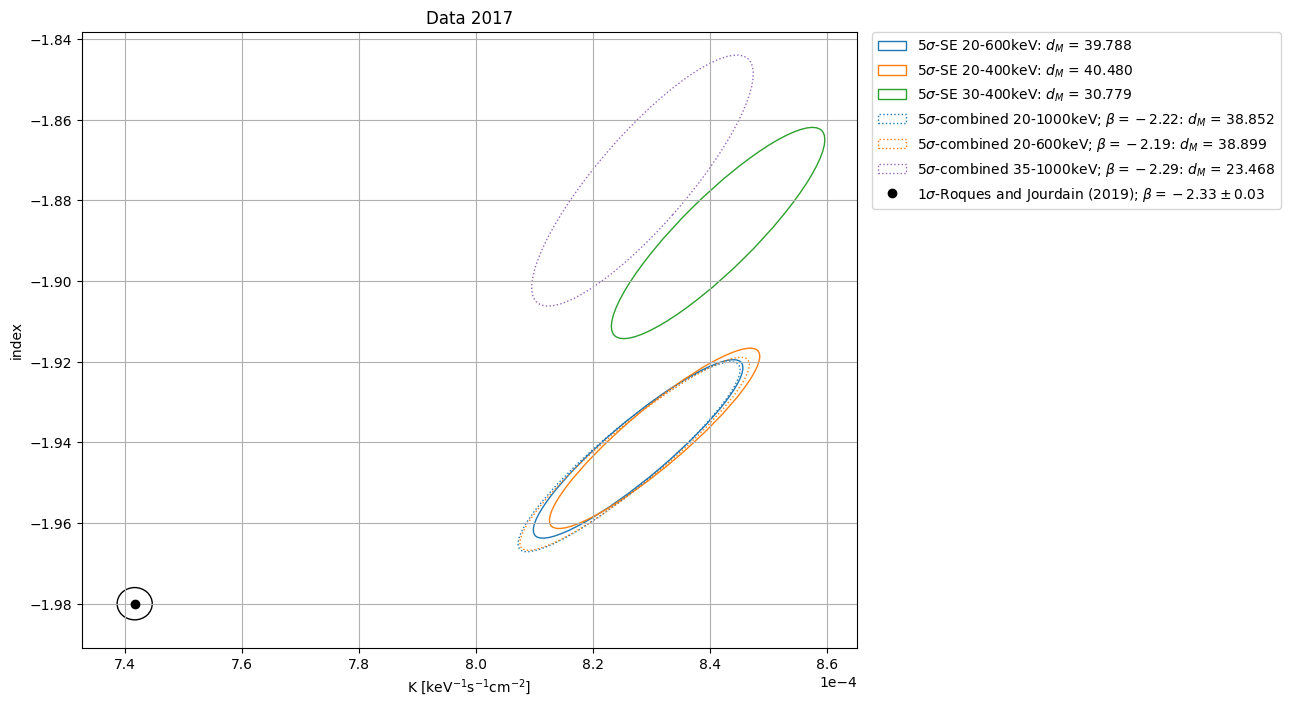

In [75]:
import math
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))

for folder, name, edgecolor, linestyle, std_dev in zip(folders, names, edgecolors, linestyles, std_devs):
    val = np.loadtxt(f"{folder}/fit_val.txt")[:2]
    cov = np.loadtxt(f"{folder}/fit_cov.txt")[:2, :2]
    confidence_ellipse(val, cov, ax, n_std=std_dev, edgecolor=edgecolor, label=name, ls=linestyle)
ax.plot(real_vals[0], real_vals[1], "ko", label="1$\sigma$-Roques and Jourdain (2019); $\\beta = -2.33 \pm 0.03$")
confidence_ellipse(real_vals, real_cov, ax, n_std=1, edgecolor="black", ls="solid")
ax.autoscale()
ax.grid()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.legend()
plt.xlabel("K [keV$^{-1}$s$^{-1}$cm$^{-2}$]")
plt.ylabel("index")
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.set_title("Data 2017")

In [74]:
fig.savefig(f"{path}/comparison_plot_2017.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig(f"{path}/spimodfit_comparison_Timm2_Crab_like.pdf", bbox_inches='tight')